# Оценка качества вин

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import numpy as np
import pandas as pd
import statsmodels.stats.api as sm

%pylab inline

Populating the interactive namespace from numpy and matplotlib


P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. **Modeling wine preferences by data mining from physicochemical properties.** *Decision Support Systems*, 47(4):547-553, 2009: имеются оценки качества 6497 португальских вин Vinho Verde, выставленные дегустаторами при слепом тестировании в баллах по шкале от 0 до 10. 

Прочитаем данные:

In [7]:
wine = pd.read_csv('wine_data.csv', sep='\t', header=0)
wine


,Type,Fixed acidity (g/l),Volatile acidity (g/l),Citric acid (g/l),Residual sugar (g/l),Chlorides (g/l),Free sulfur dioxide (mg/l),Total sulfur dioxide (mg/l),Density (g/cm3),pH,Sulphates (g/l),Alcohol (%),quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [23]:
wine = wine.sample(frac=1)
wine

,Type,Fixed acidity (g/l),Volatile acidity (g/l),Citric acid (g/l),Residual sugar (g/l),Chlorides (g/l),Free sulfur dioxide (mg/l),Total sulfur dioxide (mg/l),Density (g/cm3),pH,Sulphates (g/l),Alcohol (%),quality
1281,red,7.1,0.46,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4,6
919,red,8.4,0.62,0.12,1.8,0.072,38.0,46.0,0.99504,3.38,0.89,11.8,6
4456,white,6.6,0.29,0.31,3.9,0.027,39.0,96.0,0.99035,3.24,0.60,12.6,8
3577,white,7.9,0.33,0.26,1.2,0.044,23.0,103.0,0.99320,3.19,0.54,10.5,6
2282,white,6.4,0.27,0.32,4.5,0.240,61.0,174.0,0.99480,3.12,0.48,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1907,white,6.2,0.33,0.27,4.9,0.036,30.0,134.0,0.99270,3.20,0.42,10.4,7
6115,white,6.2,0.32,0.32,2.2,0.036,15.0,70.0,0.98990,3.16,0.48,12.7,6
5384,white,5.6,0.19,0.31,2.7,0.027,11.0,100.0,0.98964,3.46,0.40,13.2,7
5891,white,6.9,0.22,0.32,5.8,0.041,20.0,119.0,0.99296,3.17,0.55,11.2,6


In [29]:
wine.rename(columns={"Alcohol (%)": "alcohol",}, inplace=True)

,Type,Fixed acidity (g/l),Volatile acidity (g/l),Citric acid (g/l),Residual sugar (g/l),Chlorides (g/l),Free sulfur dioxide (mg/l),Total sulfur dioxide (mg/l),Density (g/cm3),pH,Sulphates (g/l),alcohol,quality
1281,red,7.1,0.46,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4,6
919,red,8.4,0.62,0.12,1.8,0.072,38.0,46.0,0.99504,3.38,0.89,11.8,6
4456,white,6.6,0.29,0.31,3.9,0.027,39.0,96.0,0.99035,3.24,0.60,12.6,8
3577,white,7.9,0.33,0.26,1.2,0.044,23.0,103.0,0.99320,3.19,0.54,10.5,6
2282,white,6.4,0.27,0.32,4.5,0.240,61.0,174.0,0.99480,3.12,0.48,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1907,white,6.2,0.33,0.27,4.9,0.036,30.0,134.0,0.99270,3.20,0.42,10.4,7
6115,white,6.2,0.32,0.32,2.2,0.036,15.0,70.0,0.98990,3.16,0.48,12.7,6
5384,white,5.6,0.19,0.31,2.7,0.027,11.0,100.0,0.98964,3.46,0.40,13.2,7
5891,white,6.9,0.22,0.32,5.8,0.041,20.0,119.0,0.99296,3.17,0.55,11.2,6


Вот так выглядит распределение экспертных оценок вин в выборке:

Text(0.5, 0, 'Quality')

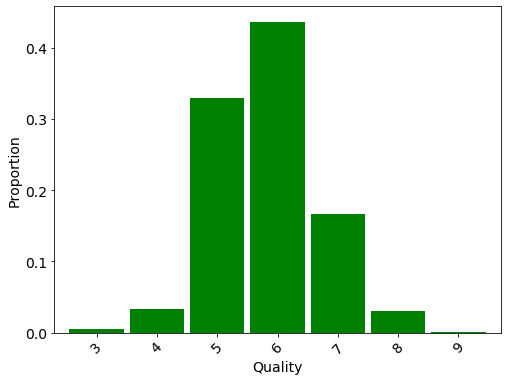

In [125]:
plt.figure(figsize(8,6))
stat = wine.groupby('quality')['alcohol'].agg(lambda x : float(len(x))/wine.shape[0])
stat.plot(kind='bar', fontsize=14, width=0.9, color="green")
plt.xticks(rotation=45)
plt.ylabel('Proportion', fontsize=14)
plt.xlabel('Quality', fontsize=14)

Давайте научимся оценивать этот признак, чтобы мы могли заранее предположить, какую оценку получит какое-то новое вино, которого в выборке нет. 
Чтобы смоделировать такую ситуацию, отделим 25% выборки для контроля качества предсказания:

In [36]:
X = wine.drop('quality', axis=1)
y = wine.quality
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=wine[['Type', 'quality']], random_state=42)

In [37]:
X_train

,Type,Fixed acidity (g/l),Volatile acidity (g/l),Citric acid (g/l),Residual sugar (g/l),Chlorides (g/l),Free sulfur dioxide (mg/l),Total sulfur dioxide (mg/l),Density (g/cm3),pH,Sulphates (g/l),alcohol
2703,white,7.3,0.31,0.69,10.2,0.041,58.0,160.0,0.99770,3.06,0.45,8.6
5596,white,6.0,0.26,0.29,3.1,0.041,37.0,144.0,0.98944,3.22,0.39,12.8
6124,white,5.8,0.13,0.22,12.7,0.058,24.0,183.0,0.99560,3.32,0.42,11.7
2226,white,7.0,0.32,0.24,6.2,0.048,31.0,228.0,0.99570,3.23,0.62,9.4
4794,white,7.0,0.21,0.42,5.3,0.037,36.0,123.0,0.99321,3.14,0.52,10.9
...,...,...,...,...,...,...,...,...,...,...,...,...
2670,white,8.3,0.22,0.38,14.8,0.054,32.0,126.0,1.00020,3.22,0.50,9.7
3761,white,9.9,0.49,0.23,2.4,0.087,19.0,115.0,0.99480,2.77,0.44,9.4
624,red,6.8,0.69,0.00,5.6,0.124,21.0,58.0,0.99970,3.46,0.72,10.2
195,red,7.8,0.59,0.33,2.0,0.074,24.0,120.0,0.99680,3.25,0.54,9.4


In [38]:
X_train['Type'] = X_train['Type'].apply(lambda x : -1 if x == 'red' else 1)
X_test['Type'] = X_test['Type'].apply(lambda x : -1 if x == 'red' else 1)

/home/vovka-dobro/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/vovka-dobro/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
X_test

,Type,Fixed acidity (g/l),Volatile acidity (g/l),Citric acid (g/l),Residual sugar (g/l),Chlorides (g/l),Free sulfur dioxide (mg/l),Total sulfur dioxide (mg/l),Density (g/cm3),pH,Sulphates (g/l),alcohol
2893,1,6.9,0.41,0.22,4.20,0.031,10.0,102.0,0.99300,3.00,0.86,11.6
1777,1,6.0,0.67,0.07,1.20,0.060,9.0,108.0,0.99310,3.11,0.35,8.7
3149,1,7.9,0.18,0.49,5.20,0.051,36.0,157.0,0.99530,3.18,0.48,10.6
19,-1,7.9,0.32,0.51,1.80,0.341,17.0,56.0,0.99690,3.04,1.08,9.2
2642,1,7.5,0.33,0.48,19.45,0.048,55.0,243.0,1.00100,2.95,0.40,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...
897,-1,7.1,0.59,0.01,2.30,0.080,27.0,43.0,0.99550,3.42,0.58,10.7
1583,-1,6.2,0.46,0.29,2.10,0.074,32.0,98.0,0.99578,3.33,0.62,9.8
5470,1,6.5,0.27,0.19,6.60,0.045,98.0,175.0,0.99364,3.16,0.34,10.1
1910,1,5.0,0.55,0.14,8.30,0.032,35.0,164.0,0.99180,3.53,0.51,12.5


Если у нас нет больше никакой информации о винах, то наше лучшее предположение об оценке — среднее имеющихся в обучающей выборке:

In [50]:
np.mean(y_train)

5.817733990147783

Если мы будем предсказывать этой величиной оценку всех вин, на обучающей выборке мы получим среднеквадратичную ошибку

In [49]:
mean_squared_error([np.mean(y_train)]*len(y_train), y_train)

0.7631666221780031

а на тестовой

In [51]:
mean_squared_error([np.mean(y_train)]*len(y_test), y_test)

0.7603326831144055

На тестовой выборке ошибка больше, поскольку среднее мы оценивали по обучающей. Это естественный эффект.

# Тип вина

Какая-то ещё информация у нас есть, например, о типе вина:

In [52]:
wine.groupby('Type')['Type'].count()

Type
red      1599
white    4898
Name: Type, dtype: int64

Распределения оценок по типам довольно сильно отличаются:

Text(0.5, 0, 'Quality')

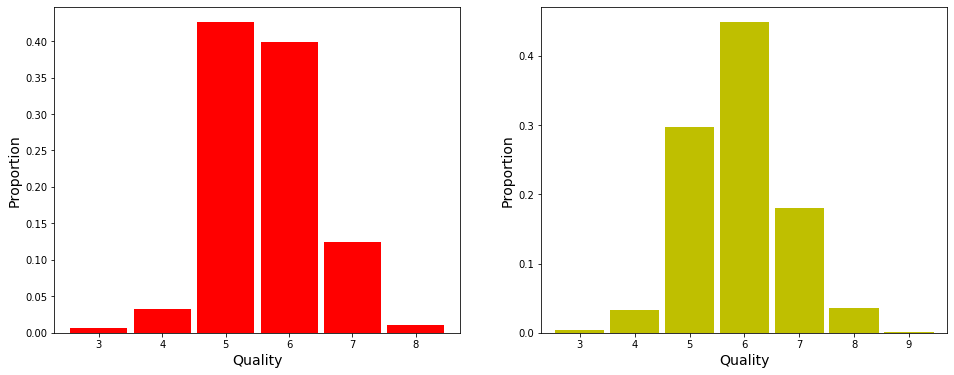

In [70]:
plt.figure(figsize(16,6))
plt.subplot(121)
stat_red = wine[wine['Type'] == 'red'].groupby('quality')['quality'].agg(lambda x: float(len(x))/wine[wine['Type'] == 'red'].shape[0])
stat_red.plot(kind='bar', color='r', width=0.9)
plt.xticks(rotation=0)
plt.ylabel('Proportion', fontsize=14)
plt.xlabel('Quality', fontsize=14)

plt.subplot(122)
stat_white = wine[wine['Type'] == 'white'].groupby('quality')['quality'].agg(lambda x: float(len(x))/wine[wine['Type'] == 'white'].shape[0])
stat_white.plot(color='y', kind='bar', width=0.9)
plt.xticks(rotation=0)
plt.ylabel('Proportion', fontsize=14)
plt.xlabel('Quality', fontsize=14)

Различие между средними статистически значимо:

In [71]:
tmeans = sm.CompareMeans(sm.DescrStatsW(wine[wine['Type'] == 'white']['quality']), 
                         sm.DescrStatsW(wine[wine['Type'] == 'red']['quality']))

tmeans.ttest_ind(alternative='two-sided', usevar='pooled', value=0)[1]

4.888069044202246e-22

95% доверительный интервал для разности средних оценок:

In [72]:
tmeans.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='pooled')

(0.19293009404017958, 0.29084357932805205)

Чтобы уточнить наше предсказание, можно оценку каждого вина предсказывать средним по оценкам вин такого же типа в выборке:

In [76]:
regressor = LinearRegression()
regressor.fit(X_train['Type'].values.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
y_train_predictions = regressor.predict(X_train['Type'].values.reshape(-1,1))

In [79]:
y_test_predictions = regressor.predict(X_test['Type'].values.reshape(-1,1))

Ошибки предсказания немного уменьшились:

In [81]:
mean_squared_error(y_train_predictions, y_train)

0.7520297699163923

In [80]:
mean_squared_error(y_test_predictions, y_test)

0.750326319291223

Вот так выглядят истинные оценки вин и их предсказания средними по типам на тестовой выборке:

Text(0, 0.5, 'Estimated quality')

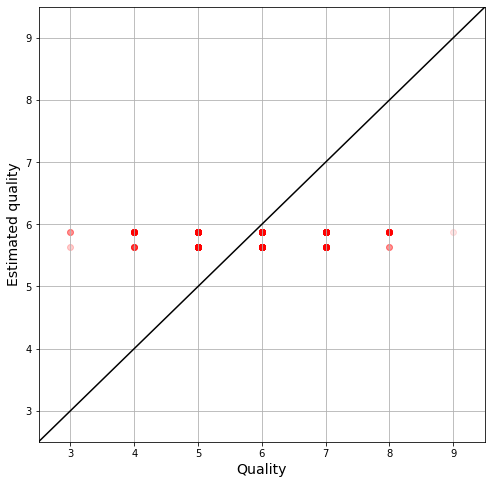

In [120]:
pyplot.figure(figsize(8,8))
pyplot.scatter(y_test, y_test_predictions, color="red", alpha=0.1)
pyplot.xlim(2.5,9.5)
pyplot.ylim(2.5,9.5)
plot(range(11), color='black')
grid()
plt.xlabel('Quality', fontsize=14)
plt.ylabel('Estimated quality', fontsize=14)

# Другие признаки

На самом деле у нас есть ещё 11 признаков, описывающих химический состав вин:

In [92]:
wine.head()

,Type,Fixed acidity (g/l),Volatile acidity (g/l),Citric acid (g/l),Residual sugar (g/l),Chlorides (g/l),Free sulfur dioxide (mg/l),Total sulfur dioxide (mg/l),Density (g/cm3),pH,Sulphates (g/l),alcohol,quality
1281,red,7.1,0.46,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4,6
919,red,8.4,0.62,0.12,1.8,0.072,38.0,46.0,0.99504,3.38,0.89,11.8,6
4456,white,6.6,0.29,0.31,3.9,0.027,39.0,96.0,0.99035,3.24,0.60,12.6,8
3577,white,7.9,0.33,0.26,1.2,0.044,23.0,103.0,0.99320,3.19,0.54,10.5,6
2282,white,6.4,0.27,0.32,4.5,0.240,61.0,174.0,0.99480,3.12,0.48,9.4,5


#### В этих графиках (ниже) не стал изменять, сейчас работать не будет если запустить

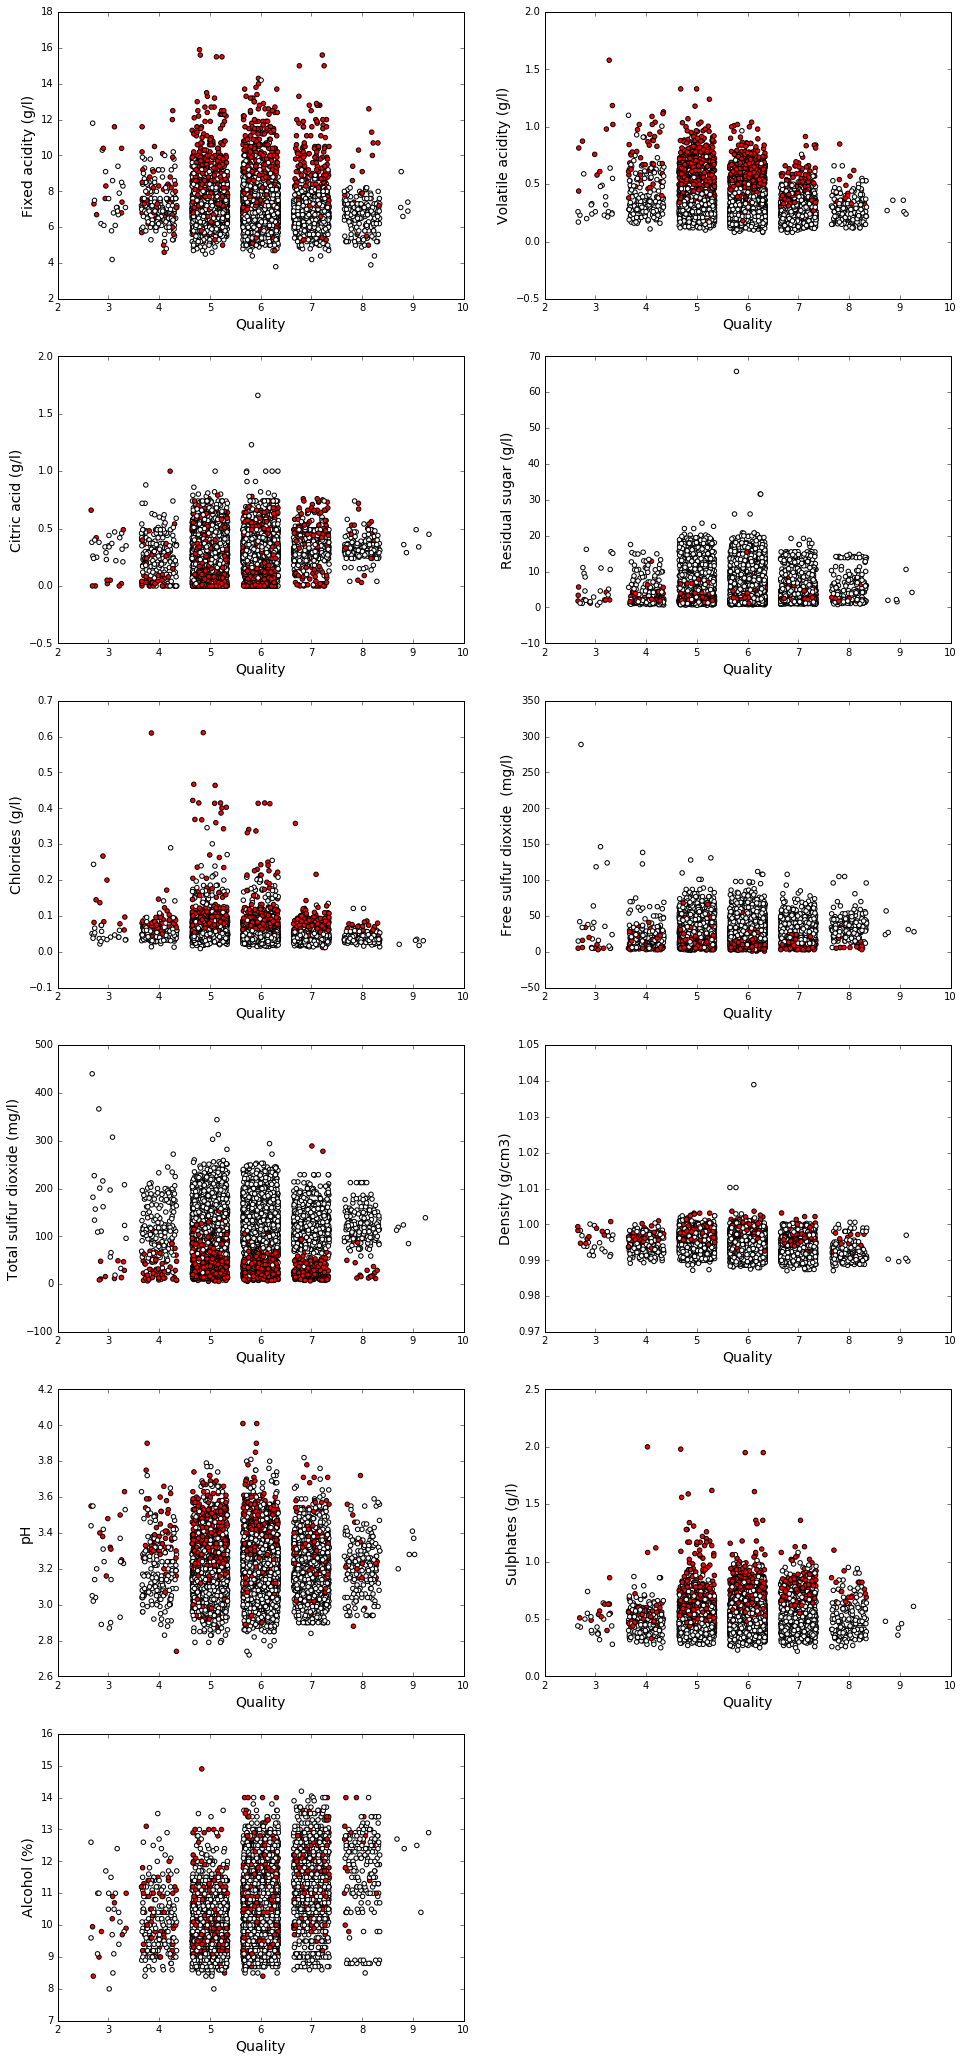

In [20]:
def jitter(arr):
    return arr + np.random.uniform(low=-0.35, high=0.35, size=len(arr))

pyplot.figure(figsize(16, 36))
for i in range (1, 12):
    pyplot.subplot(6, 2, i)
    pyplot.scatter(jitter(wine['quality']), wine.ix[:, i], color=wine["Type"], edgecolors="black")
    pyplot.xlabel('Quality', fontsize=14)
    pyplot.ylabel(str(wine.columns[i]), fontsize=14)

Попробуем их учесть при построении прогноза оценок.

## Линейная регрессия

Построим для начала линейную регрессионную модель.

In [93]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Ошибки предсказания существенно уменьшились:

In [94]:
mean_squared_error(lm.predict(X_train), y_train)

0.5372000246485399

In [95]:
mean_squared_error(lm.predict(X_test), y_test)

0.5350473322455227

Истинные оценки вин и их предсказания линейной моделью:

Text(0, 0.5, 'Estimated quality')

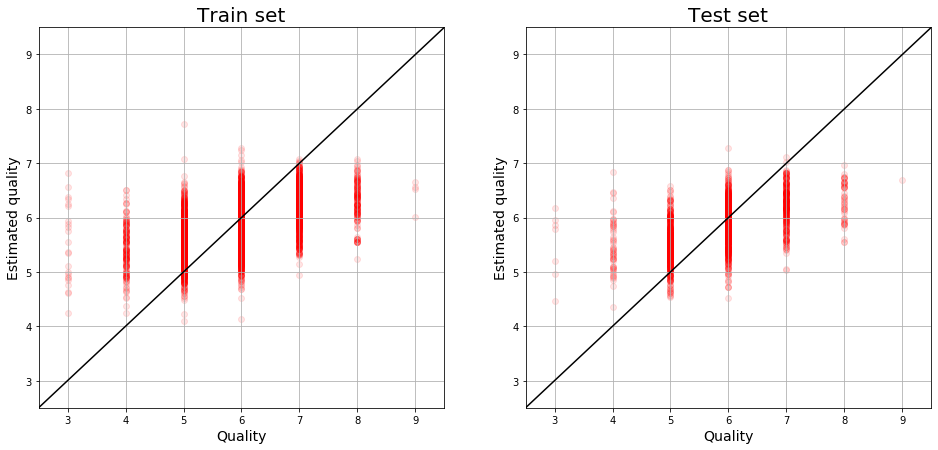

In [96]:
plt.figure(figsize(16,7))
plt.subplot(121)
pyplot.scatter(y_train, lm.predict(X_train), color="red", alpha=0.1)
pyplot.xlim(2.5,9.5)
pyplot.ylim(2.5,9.5)
plot(range(11), color='black')
grid()
pyplot.title('Train set', fontsize=20)
pyplot.xlabel('Quality', fontsize=14)
pyplot.ylabel('Estimated quality', fontsize=14)

plt.subplot(122)
pyplot.scatter(y_test, lm.predict(X_test), color="red", alpha=0.1)
pyplot.xlim(2.5,9.5)
pyplot.ylim(2.5,9.5)
plot(range(11), color='black')
grid()
pyplot.title('Test set', fontsize=20)
pyplot.xlabel('Quality', fontsize=14)
pyplot.ylabel('Estimated quality', fontsize=14)

Посчитаем коэффициент детерминации — долю объяснённой моделью дисперсии отклика:

In [97]:
lm.score(X_test, y_test)

0.2962922606802719

## Случайный лес

Построим на обучающей выборке случайный лес:

In [108]:
rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=3)

In [109]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Качество выросло ещё сильнее, хотя модель и переобучилась:

In [110]:
sqrt(mean_squared_error(rf.predict(X_train), y_train))

0.34954813573693

In [111]:
sqrt(mean_squared_error(rf.predict(X_test), y_test))

0.617472918069012

Истинные оценки вин и их предсказания случайным лесом:

Text(0, 0.5, 'Estimated quality')

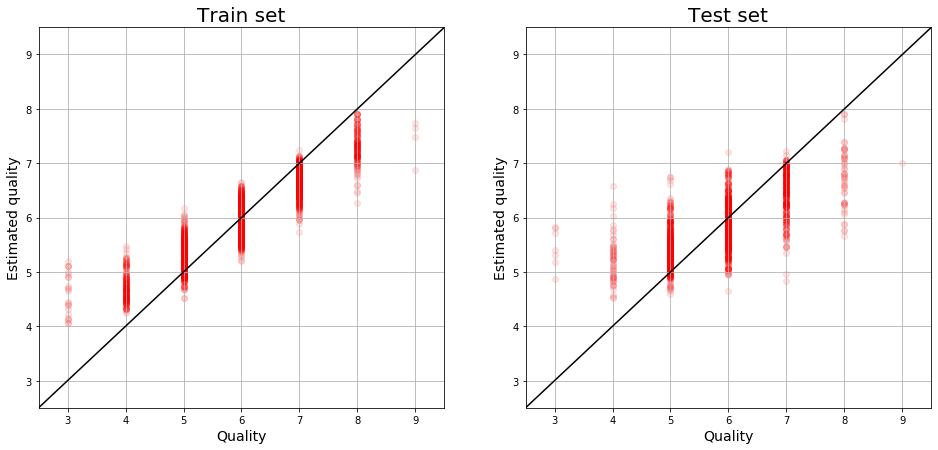

In [112]:
plt.figure(figsize(16,7))
plt.subplot(121)
pyplot.scatter(y_train, rf.predict(X_train), color="red", alpha=0.1)
pyplot.xlim(2.5,9.5)
pyplot.ylim(2.5,9.5)
plot(range(11), color='black')
grid()
pyplot.title('Train set', fontsize=20)
pyplot.xlabel('Quality', fontsize=14)
pyplot.ylabel('Estimated quality', fontsize=14)

plt.subplot(122)
pyplot.scatter(y_test, rf.predict(X_test), color="red", alpha=0.1)
pyplot.xlim(2.5,9.5)
pyplot.ylim(2.5,9.5)
plot(range(11), color='black')
grid()
pyplot.title('Test set', fontsize=20)
pyplot.xlabel('Quality', fontsize=14)
pyplot.ylabel('Estimated quality', fontsize=14)

Коэффициент детерминации для случайного леса:

In [113]:
rf.score(X_test, y_test)

0.49854039599264677

Сравним ошибки линейной регрессии и случайного леса на тестовой выборке:

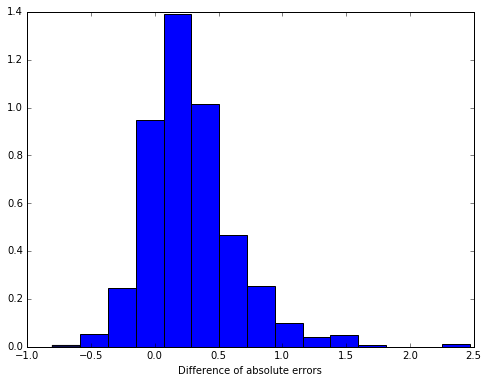

In [32]:
plt.figure(figsize(8,6))
plt.hist(abs(y_test - lm.predict(X_test)) - abs(y_test - rf.predict(X_test)), bins=15, normed=True)
plt.xlabel('Difference of absolute errors')

Различия между средними абсолютными ошибками значимы:

In [114]:
tmeans = sm.CompareMeans(sm.DescrStatsW(abs(y_test - lm.predict(X_test))), 
                         sm.DescrStatsW(abs(y_test - rf.predict(X_test))))

tmeans.ttest_ind(alternative='two-sided', usevar='pooled', value=0)[1]

3.7216178669348767e-13

95% доверительный интервал для средней разности абсолютных ошибок:

In [115]:
tmeans.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='pooled')

(0.08334526845855288, 0.1446088242419537)

То есть, используя вместо линейной регрессии наш случайный лес, мы предсказываем экспертную оценку в среднем на 0.26-0.30 баллов точнее.

Давайте посмотрим, какие признаки обладают наибольшей предсказательной способностью:

In [116]:
importances = pd.DataFrame(zip(X_train.columns, rf.feature_importances_))
importances.columns = ['feature name', 'importance']
importances.sort_values(by='importance', ascending=False)

,feature name,importance
11,alcohol,0.281114
2,Volatile acidity (g/l),0.137644
6,Free sulfur dioxide (mg/l),0.088910
10,Sulphates (g/l),0.075961
7,Total sulfur dioxide (mg/l),0.067377
4,Residual sugar (g/l),0.064028
9,pH,0.062367
5,Chlorides (g/l),0.058387
8,Density (g/cm3),0.056751
3,Citric acid (g/l),0.054586


Cильнее всего на экспертную оценку качества вина влияет содержание алкоголя.

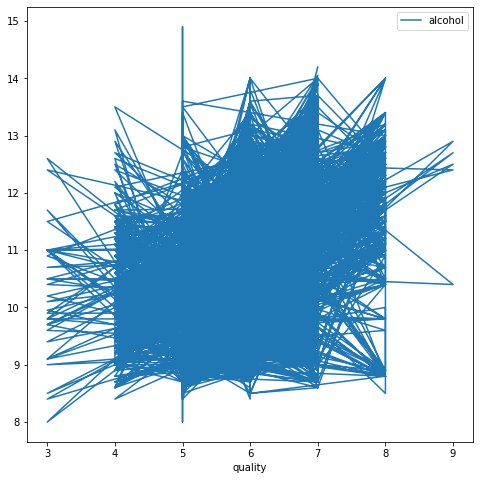

In [123]:
wine.plot(x='quality', y='alcohol')
plt.show()